In [23]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import finpy_tse as fpy
import pytse_client as tse
import yfinance as yf
import ta 
import requests
import asyncio



import math as math

In [24]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense , LSTM
plt.style.use('fivethirtyeight')


In [25]:
last_day =datetime.now()
last_day=last_day.date()
last_day=str(last_day)
last_day

'2024-05-24'

In [26]:
count=750   # tedad candle data

In [27]:
n = 400   #  tedad rooz data baraye train    mitavanad natije ro behbood ya kahesh dahad bana be noo daraie

In [28]:


#fpy>>>>> index tepix

def index_kol(bars:int=9500):
        while True:
            try:
                data=fpy.Get_CWI_History(ignore_date=True,double_date=True)
                data=data.iloc[:-bars:-1][::-1]
                data.index=data['Date']
                header = {'User-Agent': "ADN"}
                adres = 'http://cdn.tsetmc.com/api/Index/GetIndexB1LastDay/32097828799138957'
                darkhast = requests.get(url=adres, headers=header).text.split('},{')

                for a in darkhast:
                    close_tepix = int(a.split('xDrNivJIdx004":')[1].split('.')[0])
                    high_tepix = int(a.split('xPhNivJIdx004":')[1].split('.')[0])
                    low_tepix = int(a.split('xPbNivJIdx004":')[1].split('.')[0])
                    open_tepix = int(darkhast[7].split('xDrNivJIdx004":')[1].split('.')[0])
                    
                formatted_date = pd.to_datetime(last_day)
                # اطلاعات خود را به صورت یک دیکشنری تعریف می‌کنیم
                data_tepix = {
                    'Date':[formatted_date],
                    'Open':[open_tepix],
                    'High':[high_tepix],
                    'Low':[low_tepix],
                    'Close':[close_tepix],
                    'Adj Close':[close_tepix],
                    'Volume':0,  }
                # دیکشنری را به DataFrame تبدیل می‌کنیم
                instant_tepix = pd.DataFrame(data_tepix)
                instant_tepix.index=instant_tepix['Date']
                instant_tepix = pd.DataFrame(instant_tepix)
                instant_tepix = pd.concat([instant_tepix, data])
                instant_tepix = instant_tepix.sort_index(ascending=True)
                
                if  (instant_tepix.iloc[-1]['Close'] == instant_tepix.iloc[-2]['Close']  )   or  (  abs(instant_tepix.iloc[-1]['Close'] - instant_tepix.iloc[-2]['Close']  ) < 2   or  (instant_tepix.index[-1]== instant_tepix.index[-2] )):
                    instant_tepix = instant_tepix.iloc[:-1]
                return(instant_tepix)
            except Exception as e:
                print(f"An error occurred: {e}")
                asyncio.sleep(2)  # Sleep for 10 seconds before retrying



df=index_kol()
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2008-12-06,2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3,8539624
2008-12-07,2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5,11752353
2008-12-08,2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2,15299115
2008-12-10,2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7,15689653
2008-12-13,2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3,31428174
...,...,...,...,...,...,...,...
2024-05-15,2024-05-15,2165990.0,2166380.0,2159160.0,2164692.0,2164692.3,4125186697
2024-05-18,2024-05-18,2166800.0,2174950.0,2166800.0,2168676.0,2168676.3,4410308923
2024-05-19,2024-05-19,2166180.0,2166180.0,2106430.0,2112560.0,2112560.3,5689636315


In [29]:
df=df.tail(count)
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-04-07,2021-04-07,1258600.0,1258600.0,1249890.0,1249898.0,1249910.4,1068639226
2021-04-10,2021-04-10,1246740.0,1246740.0,1240750.0,1240759.0,1240696.7,588396551
2021-04-11,2021-04-11,1237340.0,1237340.0,1230920.0,1230927.0,1230876.5,1265213974
2021-04-12,2021-04-12,1228760.0,1228760.0,1225810.0,1226119.0,1226158.2,2409026367
2021-04-13,2021-04-13,1234640.0,1245540.0,1234640.0,1244587.0,1244556.7,5631017338
...,...,...,...,...,...,...,...
2024-05-15,2024-05-15,2165990.0,2166380.0,2159160.0,2164692.0,2164692.3,4125186697
2024-05-18,2024-05-18,2166800.0,2174950.0,2166800.0,2168676.0,2168676.3,4410308923
2024-05-19,2024-05-19,2166180.0,2166180.0,2106430.0,2112560.0,2112560.3,5689636315


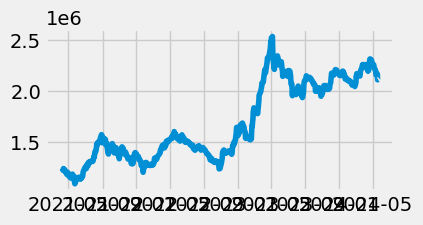

In [30]:
plt.figure(figsize=(4,2))
plt.plot(df['Close'])
plt.show()


In [31]:
data=df.filter(['Close' , 'Volume'])
dataset=data.values
dataset

array([[1.24989800e+06, 1.06863923e+09],
       [1.24075900e+06, 5.88396551e+08],
       [1.23092700e+06, 1.26521397e+09],
       ...,
       [2.11256000e+06, 5.68963632e+09],
       [2.11256000e+06, 0.00000000e+00],
       [2.11414400e+06, 3.20580210e+09]])

In [32]:
training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.10710033, 0.04393779],
       [0.10075164, 0.0241923 ],
       [0.09392154, 0.05202009],
       ...,
       [0.70637509, 0.23393305],
       [0.70637509, 0.        ],
       [0.70747546, 0.13180861]])

In [33]:
scaled_data.shape

(750, 2)

In [34]:
training_data_len


600

In [35]:

training_data=scaled_data[0:training_data_len , :]


In [36]:
training_data


array([[0.10710033, 0.04393779],
       [0.10075164, 0.0241923 ],
       [0.09392154, 0.05202009],
       ...,
       [0.62906197, 0.29016962],
       [0.63206855, 0.19197232],
       [0.63795389, 0.13937825]])

In [37]:
xtrain=[]
ytrain=[]



In [38]:
for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , :])
    ytrain.append(training_data[i,0])


In [39]:
xtrain , ytrain = np.array(xtrain),np.array(ytrain)



In [40]:
xtrain.shape


(200, 400, 2)

In [41]:

ytrain.shape


(200,)

In [42]:
ytrain=np.reshape(ytrain , (ytrain.shape[0],1,1))
ytrain.shape


(200, 1, 1)

In [43]:
model=Sequential()
# input_shape = (time steps , features )
model.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],2)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:

tekrar=4          #  tedad tekrar baraye afzayesh deghat  (tedad bar oboor az shabake asabi)





model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,batch_size=1,epochs=tekrar)


Epoch 1/4
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.0563
Epoch 2/4
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - loss: 0.0051
Epoch 3/4
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - loss: 0.0055
Epoch 4/4
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 0.0044


In [45]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len : , 0]
for i in range(n , len(test_data)):
    xtest.append(test_data[i-n : i , :])


In [46]:
test_data


array([[0.14280693, 0.2770982 ],
       [0.14273676, 0.22877469],
       [0.14498753, 0.18725983],
       ...,
       [0.70637509, 0.23393305],
       [0.70637509, 0.        ],
       [0.70747546, 0.13180861]])

In [47]:

test_data.shape


(550, 2)

In [48]:

ytest=np.array(ytest)
ytest.shape



(150,)

In [49]:
xtest=np.array(xtest)
xtest.shape


(150, 400, 2)

In [50]:
prediction=model.predict(xtest)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


In [51]:
Predict_dataset_like = np.zeros(shape=(len(prediction), 2) )

Predict_dataset_like[:,0] = prediction[:,0]

prediction = scaler.inverse_transform(Predict_dataset_like)[:,0]


In [52]:
prediction 


array([2095864.79956484, 2085061.87814689, 2076748.14352906,
       2068464.35362852, 2063003.00348496, 2060276.74718952,
       2060802.88187838, 2058780.19773698, 2057593.56323814,
       2057501.75565219, 2056928.43014812, 2055434.1973356 ,
       2056524.73417437, 2052309.47895682, 2047347.75084412,
       2041730.49940741, 2037466.337345  , 2036587.98757172,
       2037739.35766137, 2041072.83104634, 2052449.42117429,
       2059089.85528624, 2063846.34625351, 2067166.94941616,
       2070224.57103586, 2071198.50366032, 2070949.25035453,
       2068749.55775535, 2066404.68904829, 2063894.39508355,
       2061349.52312148, 2059963.14277208, 2058829.70519221,
       2059889.09609294, 2060661.48103571, 2062057.64275408,
       2070305.13862765, 2082320.26338613, 2103462.60661519,
       2126817.68426871, 2147320.29164648, 2156764.80399823,
       2160696.82852304, 2160021.39925516, 2159013.06023633,
       2159548.71888971, 2157967.74077868, 2157769.88256073,
       2167791.3240788 ,

In [53]:
rmse =np.sqrt(np.mean(((prediction- ytest)**2)))
print(rmse)


42326.40796403704


In [54]:

prediction


array([2095864.79956484, 2085061.87814689, 2076748.14352906,
       2068464.35362852, 2063003.00348496, 2060276.74718952,
       2060802.88187838, 2058780.19773698, 2057593.56323814,
       2057501.75565219, 2056928.43014812, 2055434.1973356 ,
       2056524.73417437, 2052309.47895682, 2047347.75084412,
       2041730.49940741, 2037466.337345  , 2036587.98757172,
       2037739.35766137, 2041072.83104634, 2052449.42117429,
       2059089.85528624, 2063846.34625351, 2067166.94941616,
       2070224.57103586, 2071198.50366032, 2070949.25035453,
       2068749.55775535, 2066404.68904829, 2063894.39508355,
       2061349.52312148, 2059963.14277208, 2058829.70519221,
       2059889.09609294, 2060661.48103571, 2062057.64275408,
       2070305.13862765, 2082320.26338613, 2103462.60661519,
       2126817.68426871, 2147320.29164648, 2156764.80399823,
       2160696.82852304, 2160021.39925516, 2159013.06023633,
       2159548.71888971, 2157967.74077868, 2157769.88256073,
       2167791.3240788 ,

In [55]:
prediction.shape


(150,)

In [56]:

train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction


C:\Users\MSI\AppData\Local\Temp\ipykernel_14212\631013780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


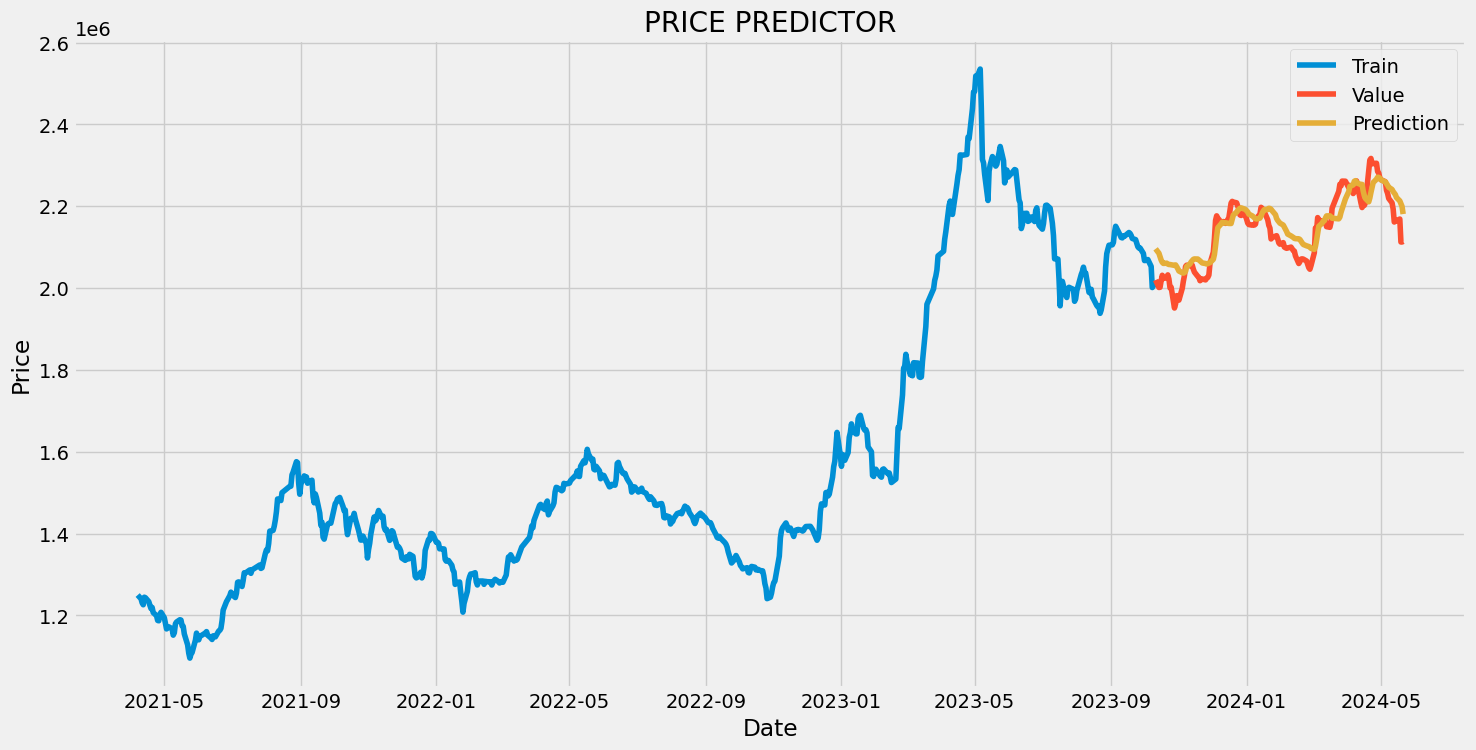

In [57]:
plt.figure(figsize=(16,8))
plt.title('PRICE PREDICTOR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Value','Prediction'])
plt.show()

In [58]:
newdf=data[-n:].values
snewdf=scaler.transform(newdf)



In [59]:
xtest=[]
xtest.append(snewdf)
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],2))


In [60]:
prediction=model.predict(xtest)

Predict_dataset_like = np.zeros(shape=(len(prediction), 2) )

Predict_dataset_like[:,0] = prediction[:,0]

prediction = scaler.inverse_transform(Predict_dataset_like)[:,0]

prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([2167355.02354181])